## Module Import

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Assignment 1.
우리는 붓꽃의 **꽃받침의 길이, 꽃받침의 너비, 꽃잎의 길이, 꽃잎의 너비**를 통해서, **꽃의 종류**를 구분 해 볼 것입니다. **Input**으로 주어 지는 데이터는 다음과 같습니다.

- Sepal Length: 꽃받침의 길이 정보이다.
- Sepal Width: 꽃받침의 너비 정보이다.
- Petal Length: 꽃잎의 길이 정보이다.
- Petal Width: 꽃잎의 너비 정보이다.
- Species: 꽃의 종류 정보이다. **setosa / versicolor / virginica** 의 3종류로 구분된다.

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42, shuffle=True)

print("X_train의 shape:", X_train.shape)
print("X_test의 shape:", X_test.shape)
print("y_train의 shape:", y_train.shape)
print("y_test의 shape:", y_test.shape)

X_train의 shape: (100, 4)
X_test의 shape: (50, 4)
y_train의 shape: (100,)
y_test의 shape: (50,)


### 1-1. Data Normalization
첫 번째로, 데이터를 정규화 하는 것이 중요 할 것 같습니다. 데이터를 정규화 해 보세요.

(Min - Max 정규화를 이용하면 될 것 같죠? hint: ndarray.min(), ndarray.max())

In [25]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())
print(X_train[:10])

[[0.73684211 0.36842105 0.53947368 0.15789474]
 [0.98684211 0.38157895 0.85526316 0.26315789]
 [0.72368421 0.38157895 0.57894737 0.18421053]
 [0.65789474 0.44736842 0.17105263 0.01315789]
 [1.         0.35526316 0.86842105 0.25      ]
 [0.75       0.34210526 0.52631579 0.11842105]
 [0.67105263 0.43421053 0.17105263 0.01315789]
 [0.64473684 0.44736842 0.15789474 0.02631579]
 [0.65789474 0.48684211 0.23684211 0.03947368]
 [0.64473684 0.25       0.44736842 0.11842105]]


## 1-2. Data Training
그 다음으로는 이제 데이터를 학습 시킬 시간입니다! SVM 모듈을 import 한 후, 학습을 시켜 보도록 하겠습니다.

In [27]:
from sklearn.svm import SVC

svm = SVC(C=2)
svm.fit(X_train, y_train)

accuracy = (sum(svm.predict(X_test) == y_test) / 50) * 100
print(f'정확도 (accuracy): {accuracy}%')

정확도 (accuracy): 100.0%


## Assignment 2.
다음은 **MNIST 데이터**에 대해 분류를 해보는 연습을 해 보겠습니다. **MNIST**는 손글씨 데이터로, **Input Data**는 [28 x 28]의 데이터로 이루어져 있습니다. 일단, 우리가 이를 학습 시키기 전에 한번 데이터를 확인 해 볼까요?

이 예제는 DNN을 이용하기 때문에, **Pytorch**로 진행 하겠습니다. 실습은 **Hyperparameter**만 고치면 됩니다.

**학습률 95%에 도전 해 보세요!**

In [2]:
import time
import random
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [3]:
# 이 부분은 절대 변경하지 마세요.

RANDOM_SEED = 123
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

## 2-0. Data Load
데이터를 불러와 보겠습니다. `transforms.Compose`를 이용하여, 데이터를 pytorch에서 사용하는 **Tensor**형으로 바꾸고, 이를 **Gaussian Distribution**으로 정규화합니다.

In [4]:
# 수정 가능한 셀입니다.
BATCH_SIZE = 64  # 60000을 사용하면, Full-Batch 학습을 진행 합니다.

In [5]:
# Don't Touch!
custom_train_transform = transforms.Compose([  
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

custom_test_transform = transforms.Compose([
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

`MNIST`를 이용하여 **MNIST** 데이터를 불러 오고, 이를 transform 해 줍니다. 또한, `DataLoader`를 이용하여, 셔플을 해준 후, 미니 배치를 생성 합니다.

In [9]:
train_dataset = MNIST(".", train=True, download=True, transform=custom_train_transform)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          drop_last=True,
                          num_workers=2)


test_dataset = MNIST(".", train=False, download=True, transform=custom_test_transform)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=2)

데이터가 잘 들어 왔는지 확인 합니다.

 | Batch index: 0 | Batch size: 64
input batch의 모양: (64, 1, 28, 28)


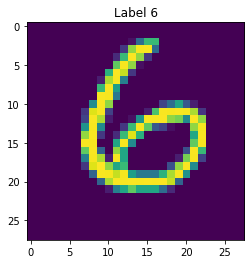

break minibatch for-loop


In [10]:
for batch_idx, (x, y) in enumerate(train_loader):
    print(' | Batch index:', batch_idx, end='')
    print(' | Batch size:', y.size()[0])

    x = x.to(DEVICE)
    y = y.to(DEVICE)

    x_numpy = x.numpy()
    y_numpy = y.numpy()
    print('input batch의 모양:', x_numpy.shape)
    plt.imshow(x_numpy[0].reshape(28, 28))
    plt.title(f'Label {y_numpy[0]}')
    plt.show()

    print('break minibatch for-loop')
    break

## 2-1. Deep Neural Network
아래 셀은 Deep Neural Network를 정의 합니다.

In [11]:
# 변경 가능 합니다.
class DNN(nn.Module):
    def __init__(self, num_features, num_hidden_1, num_hidden_2, num_hidden_3, num_classes):
        """
        num_features: input feature 갯수
        num_hidden_1: 첫 번째 레이어의 노드 갯수
        num_hidden_2: 두 번째 레이어의 노드 갯수
        num_hidden_3: 세 번째 레이어의 노드 갯수
        num_classes: 분류하고자 하는 class 갯수
        """
        super(DNN, self).__init__()
        
        self.num_classes = num_classes
        
        # 수정 가능!: 레이어를 쌓는 법을 아신다면, 여기서 레이어를 쌓으셔도, 혹은 지우셔도 무방 합니다. (단, nn.Linear만)
        self.linear_1 = nn.Linear(num_features, num_hidden_1)
        self.linear_2 = nn.Linear(num_hidden_1, num_hidden_2)
        self.linear_3 = nn.Linear(num_hidden_2, num_hidden_3)
        self.linear_out = nn.Linear(num_hidden_3, num_classes)
    
    def forward(self, x):
        out = self.linear_1(x)
        out = torch.relu(out)
        out = self.linear_2(out)
        out = torch.relu(out)
        out = self.linear_3(out)
        out = torch.relu(out)
        logits = self.linear_out(out)
        probas = torch.sigmoid(logits)
        return logits, probas

# 수정 가능!
model = DNN(num_features=28*28,
        num_hidden_1=100,
        num_hidden_2=50,
        num_hidden_3=20,
        num_classes=10)

model = model.to(DEVICE)

## 2-2. Training
여기서는 **Optimizer**와, **Epoch**를 설정 합니다. 

In [16]:
# 수정 가능!
LEARNING_LATE = 0.01
NUM_EPOCHS = 20

In [17]:
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_LATE)

In [18]:
def compute_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        cross_entropy += F.cross_entropy(logits, targets).item()
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples
    

start_time = time.time()
train_acc_lst, test_acc_lst = [], []
train_loss_lst, test_loss_lst = [], []

for epoch in range(NUM_EPOCHS):
    
    model.train()
    
    for batch_idx, (features, targets) in enumerate(train_loader):
    
        ### PREPARE MINIBATCH
        features = features.view(-1, 28*28).to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)  # 모델 계산
        cost = F.cross_entropy(logits, targets)  # 크로스 엔트로피 계산
        optimizer.zero_grad()  # 기울기 초기화
        
        cost.backward()  # 역전파
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()  # step 적용
        
        ### LOGGING
        if not batch_idx % 40:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

    # 매 Epoch마다 evaluation을 진행합니다. 
    # Epoch마다 Loss를 기록하여 학습과정을 살펴보고 Underfitting, Overfitting 여부를 확인합니다.
    model.eval()
    with torch.set_grad_enabled(False): # Gradient 계산이 안되도록
        train_acc, train_loss = compute_accuracy_and_loss(model, train_loader, device=DEVICE) # train acc, loss 계산
        test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, device=DEVICE)    # test acc, loss 계산
        
        # list에 train, test의  acc, loss 추가
        train_acc_lst.append(train_acc)
        test_acc_lst.append(test_acc)
        train_loss_lst.append(train_loss)
        test_loss_lst.append(test_loss)
        
        # 로깅
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Test Acc.: {test_acc:.2f}%')
    
    # 1 epoch 학습 소요시간
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')

# 총 학습 소요시간
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

Epoch: 001/020 | Batch 000/937 | Cost: 0.0737
Epoch: 001/020 | Batch 040/937 | Cost: 0.3470
Epoch: 001/020 | Batch 080/937 | Cost: 0.2875
Epoch: 001/020 | Batch 120/937 | Cost: 0.1576
Epoch: 001/020 | Batch 160/937 | Cost: 0.2785
Epoch: 001/020 | Batch 200/937 | Cost: 0.3248
Epoch: 001/020 | Batch 240/937 | Cost: 0.3727
Epoch: 001/020 | Batch 280/937 | Cost: 0.1340
Epoch: 001/020 | Batch 320/937 | Cost: 0.2222
Epoch: 001/020 | Batch 360/937 | Cost: 0.4003
Epoch: 001/020 | Batch 400/937 | Cost: 0.1258
Epoch: 001/020 | Batch 440/937 | Cost: 0.2260
Epoch: 001/020 | Batch 480/937 | Cost: 0.2162
Epoch: 001/020 | Batch 520/937 | Cost: 0.1750
Epoch: 001/020 | Batch 560/937 | Cost: 0.1224
Epoch: 001/020 | Batch 600/937 | Cost: 0.1676
Epoch: 001/020 | Batch 640/937 | Cost: 0.3702
Epoch: 001/020 | Batch 680/937 | Cost: 0.3033
Epoch: 001/020 | Batch 720/937 | Cost: 0.2718
Epoch: 001/020 | Batch 760/937 | Cost: 0.2446
Epoch: 001/020 | Batch 800/937 | Cost: 0.1849
Epoch: 001/020 | Batch 840/937 | C

Epoch: 008/020 | Batch 000/937 | Cost: 0.1980
Epoch: 008/020 | Batch 040/937 | Cost: 0.0825
Epoch: 008/020 | Batch 080/937 | Cost: 0.0951
Epoch: 008/020 | Batch 120/937 | Cost: 0.0543
Epoch: 008/020 | Batch 160/937 | Cost: 0.0646
Epoch: 008/020 | Batch 200/937 | Cost: 0.1128
Epoch: 008/020 | Batch 240/937 | Cost: 0.2344
Epoch: 008/020 | Batch 280/937 | Cost: 0.3762
Epoch: 008/020 | Batch 320/937 | Cost: 0.0942
Epoch: 008/020 | Batch 360/937 | Cost: 0.0754
Epoch: 008/020 | Batch 400/937 | Cost: 0.0786
Epoch: 008/020 | Batch 440/937 | Cost: 0.1946
Epoch: 008/020 | Batch 480/937 | Cost: 0.3427
Epoch: 008/020 | Batch 520/937 | Cost: 0.1430
Epoch: 008/020 | Batch 560/937 | Cost: 0.0346
Epoch: 008/020 | Batch 600/937 | Cost: 0.0527
Epoch: 008/020 | Batch 640/937 | Cost: 0.0742
Epoch: 008/020 | Batch 680/937 | Cost: 0.0604
Epoch: 008/020 | Batch 720/937 | Cost: 0.1201
Epoch: 008/020 | Batch 760/937 | Cost: 0.0534
Epoch: 008/020 | Batch 800/937 | Cost: 0.1878
Epoch: 008/020 | Batch 840/937 | C

Epoch: 015/020 | Batch 000/937 | Cost: 0.0837
Epoch: 015/020 | Batch 040/937 | Cost: 0.0756
Epoch: 015/020 | Batch 080/937 | Cost: 0.0989
Epoch: 015/020 | Batch 120/937 | Cost: 0.0373
Epoch: 015/020 | Batch 160/937 | Cost: 0.1872
Epoch: 015/020 | Batch 200/937 | Cost: 0.1655
Epoch: 015/020 | Batch 240/937 | Cost: 0.1507
Epoch: 015/020 | Batch 280/937 | Cost: 0.0935
Epoch: 015/020 | Batch 320/937 | Cost: 0.0802
Epoch: 015/020 | Batch 360/937 | Cost: 0.0969
Epoch: 015/020 | Batch 400/937 | Cost: 0.0165
Epoch: 015/020 | Batch 440/937 | Cost: 0.0528
Epoch: 015/020 | Batch 480/937 | Cost: 0.0934
Epoch: 015/020 | Batch 520/937 | Cost: 0.0676
Epoch: 015/020 | Batch 560/937 | Cost: 0.1019
Epoch: 015/020 | Batch 600/937 | Cost: 0.0576
Epoch: 015/020 | Batch 640/937 | Cost: 0.0843
Epoch: 015/020 | Batch 680/937 | Cost: 0.0703
Epoch: 015/020 | Batch 720/937 | Cost: 0.1550
Epoch: 015/020 | Batch 760/937 | Cost: 0.0339
Epoch: 015/020 | Batch 800/937 | Cost: 0.1117
Epoch: 015/020 | Batch 840/937 | C

## 2-3. Evaluation
테스트 데이터와 학습 데이터의 Loss 변화를 확인 합니다.

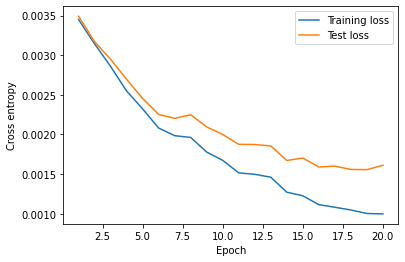

In [19]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_lst, label='Training loss')
plt.plot(range(1, NUM_EPOCHS+1), test_loss_lst, label='Test loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

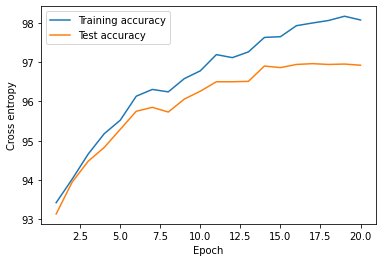

In [20]:
plt.plot(range(1, NUM_EPOCHS+1), train_acc_lst, label='Training accuracy')
plt.plot(range(1, NUM_EPOCHS+1), test_acc_lst, label='Test accuracy')
plt.legend(loc='upper left')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

In [21]:
model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, DEVICE)
    print(f'Test accuracy: {test_acc:.2f}%')

Test accuracy: 96.92%


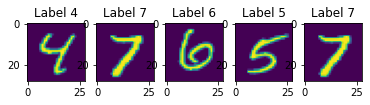

In [18]:
for batch_idx, (x, y) in enumerate(test_loader):
    x = x.to(DEVICE)
    y = y.to(DEVICE)

    x_numpy = x.numpy()
    
    fig, axes = plt.subplots(1, 5)
    
    for ax in axes:
        index = random.randint(0, 64)
        logits, probas = model(x[index].view(-1, 28*28))
        _, predicted_labels = torch.max(probas, 1)
        ax.imshow(x_numpy[index].reshape(28, 28))
        ax.set_title(f'Label {predicted_labels[0]}')
        
    plt.show()
    break

## 2-4. Discussion
1. Train Data에 대한 정확도와, Test Data에 대한 정확도가 왜 다를까요?
- train data에 대해 학습을 잘 시켜도, test data에 대해 잘 맞을지는 확실하지 않기 때문이다. test data에는 train data set에는 없는 값이 있을 수도 있기때문에 이에 대해서 정확

2. 다른 사람들은 정확도가 99퍼가 넘는 모델도 만들던데, DNN의 한계가 있다면 어떤 점이 있을까요? (Hint: 우리는 28x28의 이미지를 768x1로 쫙 펴서 넣어 줬습니다.)
- 원래 이미지를 28 by 28 크기로 쪼개고, 이를 1차원 배열로 만들기 위해 768x1로 펼치면,  국소 부분들을 추출 못 하는 경우가 생긴다. 이것이 이미지에 대한 정확도가 낮아지는 DNN의 한계점이다. 이에 대한 단점을 해결한 것이 CNN이다.